In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

In [2]:
from sklearn.datasets import make_blobs

In [44]:
X, y = make_blobs(n_samples= 1000, n_features= 2, centers= 3)

In [45]:
X.shape, y.shape

((1000, 2), (1000,))

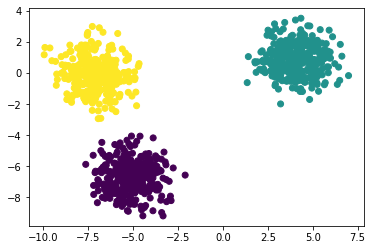

In [46]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

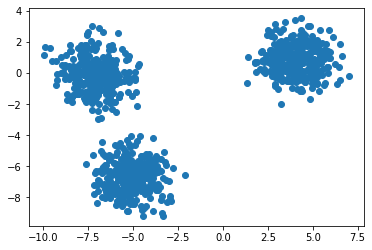

In [47]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [57]:
# initialization function
def k_means(colors, k = 2):
    clusters = {} # empty dict.
    
    for i in range(k) :
        cluster = {
            'cen' : 10*(np.random.random((2,))-1),
            'points' : [],
            'color' : colors[i]
        }

        clusters[i] = cluster
    
    return clusters

In [58]:
def distance(x1, x2):
    return np.sqrt(((x1-x2)**2).sum())

In [59]:
def assignPointsToCluster(clusters, data, k = 2):
    for i in range(data.shape[0]): # for loop over the rows of data
        cur_point = data[i]
        dist = []

        for ix in range(k): # calculate dist from cluster centers
            d = distance(cur_point, clusters[ix]['cen'])
            dist.append(d)
        
        nearest = np.argmin(dist)

        clusters[nearest]['points'].append(cur_point)

    return clusters

In [60]:
def UpdateCluster(clusters, k = 2):
    for i in range(k):
        pnts = clusters[i]['points']
        pnts = np.array(pnts)

        if pnts.shape[0] > 0:
            new_cen = pnts.mean(axis = 0)
            clusters[i]['cen'] = new_cen
            clusters[i]['points'] = []

    return clusters

In [61]:
def plot_cluster(clusters, k = 2):
    for i in range(k) :
        pnts = clusters[i]['points']
        pnts = np.array(pnts)
        colour = clusters[i]['color']
        cen = clusters[i]['cen']

        if pnts.shape[0] > 0 :
            plt.scatter(pnts[:, 0], pnts[:, 1], c = colour)
        
        plt.scatter(cen[0], cen[1], c = 'black', marker= '*')
    plt.show()

In [62]:
def k_means_fit(clusters, data, k = 2, iter = 5):
    for i in range(iter) :
        clusters = assignPointsToCluster(clusters, data, k=k)
        plot_cluster(clusters, k = k)
        clusters = UpdateCluster(clusters, k = k)
        print(clusters)

In [63]:
a = k_means(['blue', 'red', 'purple'], k = 3)

In [64]:
a

{0: {'cen': array([-7.11969082, -6.72531441]), 'color': 'blue', 'points': []},
 1: {'cen': array([-5.40860925, -1.63140882]), 'color': 'red', 'points': []},
 2: {'cen': array([-1.13037763, -4.97232114]),
  'color': 'purple',
  'points': []}}

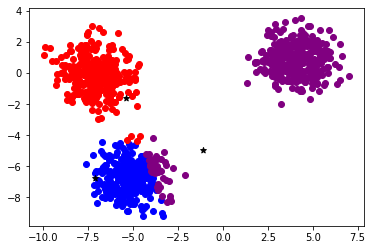

{0: {'cen': array([-5.31455577, -6.80657853]), 'points': [], 'color': 'blue'}, 1: {'cen': array([-7.0867347 , -0.20561833]), 'points': [], 'color': 'red'}, 2: {'cen': array([3.21712665, 0.04071958]), 'points': [], 'color': 'purple'}}


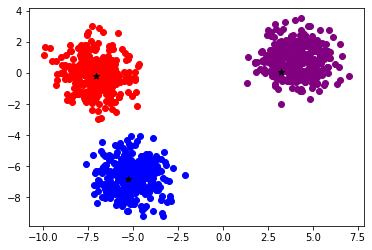

{0: {'cen': array([-5.08381095, -6.71250205]), 'points': [], 'color': 'blue'}, 1: {'cen': array([-7.11217146, -0.15753013]), 'points': [], 'color': 'red'}, 2: {'cen': array([4.09152695, 0.86174883]), 'points': [], 'color': 'purple'}}


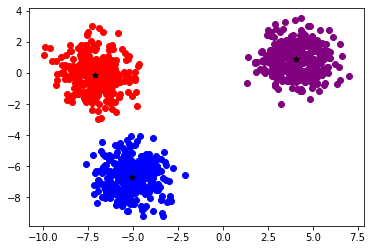

{0: {'cen': array([-5.08381095, -6.71250205]), 'points': [], 'color': 'blue'}, 1: {'cen': array([-7.11217146, -0.15753013]), 'points': [], 'color': 'red'}, 2: {'cen': array([4.09152695, 0.86174883]), 'points': [], 'color': 'purple'}}


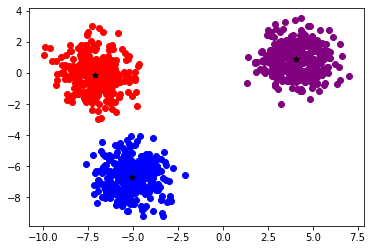

{0: {'cen': array([-5.08381095, -6.71250205]), 'points': [], 'color': 'blue'}, 1: {'cen': array([-7.11217146, -0.15753013]), 'points': [], 'color': 'red'}, 2: {'cen': array([4.09152695, 0.86174883]), 'points': [], 'color': 'purple'}}


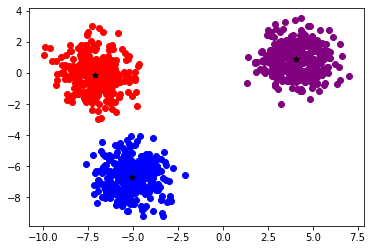

{0: {'cen': array([-5.08381095, -6.71250205]), 'points': [], 'color': 'blue'}, 1: {'cen': array([-7.11217146, -0.15753013]), 'points': [], 'color': 'red'}, 2: {'cen': array([4.09152695, 0.86174883]), 'points': [], 'color': 'purple'}}


In [65]:
k_means_fit(a, X, k = 3, iter = 5)

In [66]:
from sklearn.cluster import KMeans

In [68]:
# elbow methode

inertail_distance = []

for i in range(1, 7):
    kmean = KMeans(n_clusters= i)
    kmean.fit(X)
    inertail_distance.append(kmean.inertia_)

In [69]:
inertail_distance

[37024.367851310795,
 9860.251285361763,
 2009.3615713098868,
 1766.9065732477602,
 1535.04918412698,
 1321.1886893924466]

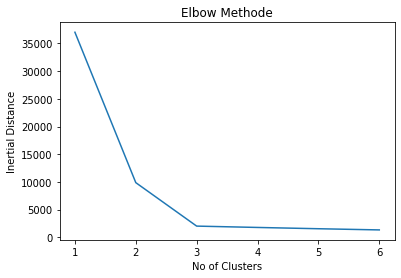

In [74]:
plt.plot(list(range(1,7)), inertail_distance)
plt.title("Elbow Methode")
plt.xlabel("No of Clusters")
plt.ylabel("Inertial Distance")
plt.show()

In [75]:
k_means = KMeans(n_clusters= 3, n_jobs= -1)

In [77]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
k_means.labels_

array([1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0,
       1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 0, 1,
       2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 0, 2,
       2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 0, 0,
       1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 2, 2,
       1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 2,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2,
       0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0,
       2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 1,

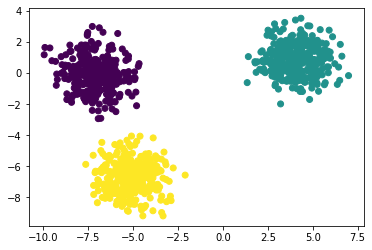

In [79]:
plt.scatter(X[:, 0], X[:, 1], c = k_means.labels_)
plt.show()